In [2]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Import custom modules
from models.resnet_model import MalariaResNet50
from data_prep import get_dataloaders

In [5]:
MODEL_PATH = 'models/malaria_model.pth'


Total Classes: 2
Train batches: 689, Val batches: 87, Test batches: 87
Using device: cuda


/opt/conda/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded from models/malaria_model.pth
Running inference on test set...

Test Accuracy: 0.9699

Classification Report:
              precision    recall  f1-score   support

 Parasitized       0.97      0.97      0.97      1378
  Uninfected       0.97      0.97      0.97      1378

    accuracy                           0.97      2756
   macro avg       0.97      0.97      0.97      2756
weighted avg       0.97      0.97      0.97      2756



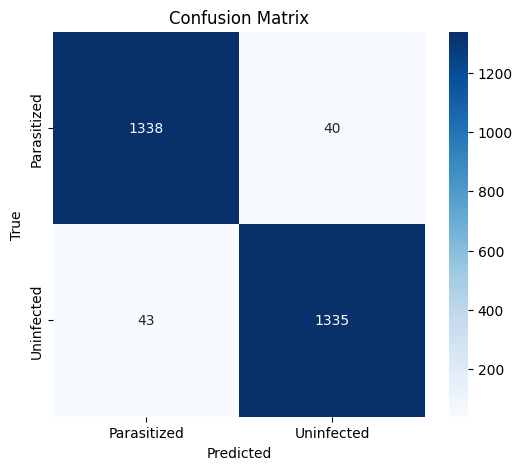

In [6]:
def evaluate():
    # Get all loaders and datasets
    train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_dataloaders()

    # Define device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize and load model
    model = MalariaResNet50(num_classes=2)
    model.load(MODEL_PATH)
    model = model.to(device)
    model.eval()  # Set to evaluation mode

    # Get test data
    y_true = []
    y_pred = []

    print("Running inference on test set...")
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # -----------------------------
    # Compute Metrics
    # -----------------------------
    classes = test_dataset.classes  # ['uninfected', 'parasitized']

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\nTest Accuracy: {acc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

if __name__ == '__main__':
    evaluate()